In [ ]:
! pip install -q kaggle 

In [ ]:
!cd ~/.kaggle

/bin/bash: line 0: cd: /root/.kaggle: No such file or directory


In [ ]:
# Here you need to upload your own API credentials file that you can find on 
# your kaggle account. Without an account and its API key it is not possible
# to download the dataset

from google.colab import files 
files.upload()


In [ ]:
! mkdir ~/.kaggle 

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d moltean/fruits

 99% 756M/760M [00:08<00:00, 122MB/s]
100% 760M/760M [00:08<00:00, 96.1MB/s]


In [ ]:
# extract dataset files from zip file
import zipfile
with zipfile.ZipFile("/content/fruits.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/fruits")

In [ ]:
# import image processing module
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 7.0.0


In [ ]:
# Loop over the Training data folders and create the train set, feature are  
# built in an array of matrices N*32*32*3 where N is the number of training 
# examples(images), labels are built in a N*10 array. 
# Feature and labels are coupled by the index in the range 1-N

from numpy import asarray
from PIL import Image
import os
import numpy as np

labels = {"Apple":0,
          "Banana":1,
          "Plum":2,
          "Pepper":3,
          "Cherry":4,
          "Grape ":5, # with space so as not include also grapefruit
          "Tomato":6,
          "Potato":7,
          "Pear":8,
          "Peach":9}

Train_data = []
Train_labels = []

for categoryname in os.listdir("/content/fruits/fruits-360/Training"):
  for labelname in labels:
    lunghezzanome = len(labelname)

    if categoryname[:lunghezzanome] == labelname:
      
      categorypath = "/content/fruits/fruits-360/Training/" + categoryname
      for filename in os.listdir(categorypath):
        if filename.endswith(".jpg"):
          image = Image.open(categorypath + "/" + filename).resize((32,32))
          datapoint = asarray(image)
          #normalize it
          datapoint = datapoint/255  #(datapoint-127.5) /127.5 
          Train_data.append(datapoint)
          Train_labels.append(labels[labelname])

Train_data = np.asarray(Train_data)
Train_labels = np.asarray(Train_labels)
          

print("Features shape: ", Train_data.shape," Labels shape", Train_labels.shape)
      

Features shape:  (32607, 32, 32, 3)  Labels shape (32607,)


In [ ]:
# Repeat the same thing for the test set

Test_data = []
Test_labels = []

for categoryname in os.listdir("/content/fruits/fruits-360/Test"):
  for labelname in labels:
    lunghezzanome = len(labelname)

    if categoryname[:lunghezzanome] == labelname:
      categorypath = "/content/fruits/fruits-360/Test/" + categoryname
      for filename in os.listdir(categorypath):
        if filename.endswith(".jpg"):
          image = Image.open(categorypath + "/" + filename).resize((32,32))
          datapoint = asarray(image)
          datapoint =datapoint/255  #(datapoint-127.5) /127.5 
          Test_data.append(datapoint)
          Test_labels.append(labels[labelname])

Test_data = np.asarray(Test_data)
Test_labels = np.asarray(Test_labels)
          

print("Data shape: ", Test_data.shape," Labels shape", Test_labels.shape)
      



Data shape:  (10906, 32, 32, 3)  Labels shape (10906,)


In [ ]:
# building the FIRST model

import tensorflow.keras as keras
import tensorflow as tf

tf.random.set_seed(1) # we want reproducibility


model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(32,32,3)), 
                          keras.layers.Dense(128, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'softmax') 
])

model.compile(optimizer ='SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# fit the model
history = model.fit(Train_data, Train_labels, validation_data=(Test_data,Test_labels), epochs = 10, batch_size = 32 )


Epoch 1/10
1019/1019 [==============================] - 4s 4ms/step - loss: 0.9725 - accuracy: 0.6832 - val_loss: 0.9484 - val_accuracy: 0.6625
Epoch 2/10
1019/1019 [==============================] - 4s 4ms/step - loss: 0.4388 - accuracy: 0.8764 - val_loss: 0.6293 - val_accuracy: 0.7910
Epoch 3/10
1019/1019 [==============================] - 4s 4ms/step - loss: 0.2678 - accuracy: 0.9292 - val_loss: 0.5255 - val_accuracy: 0.8145
Epoch 4/10
1019/1019 [==============================] - 4s 4ms/step - loss: 0.1849 - accuracy: 0.9560 - val_loss: 0.4616 - val_accuracy: 0.8395
Epoch 5/10
1019/1019 [==============================] - 4s 4ms/step - loss: 0.1368 - accuracy: 0.9700 - val_loss: 0.3782 - val_accuracy: 0.8671
Epoch 6/10
1019/1019 [==============================] - 4s 3ms/step - loss: 0.1055 - accuracy: 0.9791 - val_loss: 0.3457 - val_accuracy: 0.8771
Epoch 7/10
1019/1019 [==============================] - 4s 4ms/step - loss: 0.0826 - accuracy: 0.9851 - val_loss: 0.3030 - val_accuracy:

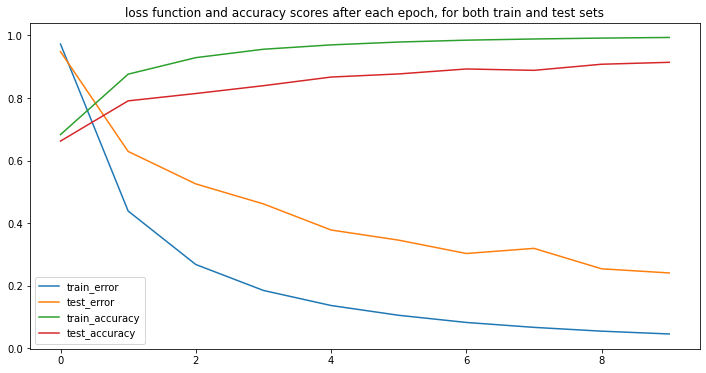

In [ ]:
# Plot train erro, test error, per iteration
import matplotlib.pyplot as plt
plt.subplots(figsize=(12, 6))
plt.title("loss function and accuracy scores after each epoch, for both train and test sets")
plt.plot(history.history['loss'], label='train_error')
plt.plot(history.history['val_loss'], label='test_error')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='test_accuracy')
plt.legend()

In [ ]:
test_loss, test_acc = model.evaluate(Test_data, Test_labels, verbose=1)
train_loss, train_acc = model.evaluate(Train_data,Train_labels, verbose=1)

print('\nTrain accuracy:', train_acc)
print('\nTest accuracy:', test_acc)



1019/1019 [==============================] - 2s 2ms/step - loss: 0.0438 - accuracy: 0.9926

Train accuracy: 0.9925782680511475

Test accuracy: 0.914267361164093


In [ ]:
# now  that we have our model, we can make predictions

predictions = model.predict(Test_data)
print("\nPredictions array: ", predictions[0])
print("\nSum of entries of a single prediction array: ",  np.sum(predictions[0]))

x = []
for element in predictions:
  x.append(np.max(element))

print("\nminimum confidence in a prediction: ", np.min(x))



Predictions array:  [1.9853006e-04 9.6472597e-01 1.2086163e-08 2.3404959e-12 5.4526299e-07
 5.0150460e-11 3.2933495e-10 4.9298920e-04 3.4579344e-02 2.5565896e-06]

Sum of entries of a single prediction array:  0.99999994

minimum confidence in a prediction:  0.28052402


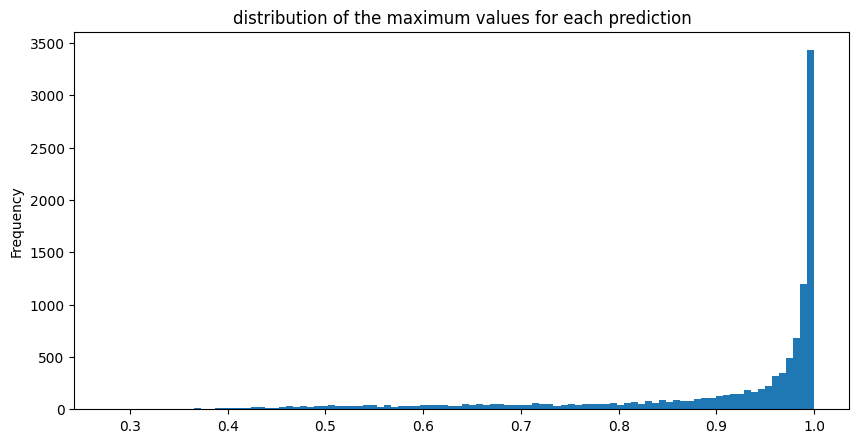

In [ ]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.hist(x, bins=100)
plt.gca().set(title="distribution of the maximum values for each prediction", ylabel='Frequency');

In [ ]:
wrong_classified = []

for x in range(len(Test_labels)):
  index = x - 1

  if np.argmax(predictions[index]) != Test_labels[index]:
    wrong_classified.append(index)

len(wrong_classified)

935

In [ ]:
print("zero one loss over the test set: ", len(wrong_classified)/len(Test_labels))

zero one loss over the test set:  0.08573262424353567


   True labe:  Banana
   Model prediction:  Pear


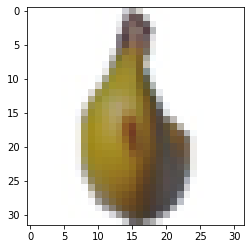



   True labe:  Potato
   Model prediction:  Pear


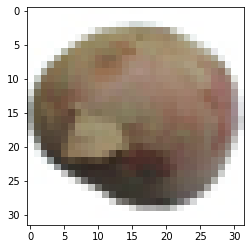



   True labe:  Potato
   Model prediction:  Pear


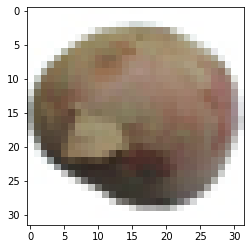

In [ ]:
from PIL import Image
from matplotlib import pyplot
import random

def GetKey( dictionary, numericlabel):
  mylist = []
  for element in dictionary.keys():
    mylist.append(element)
  
  return mylist[numericlabel]


for i in range(3):
  wrong_classified_index = random.choice(wrong_classified)

  image = Test_data[wrong_classified_index]

  true_label = Test_labels[wrong_classified_index]

  label_predicted = np.argmax(predictions[wrong_classified_index])

  # convert back from array to image, very important to rescale back to 255 max value
  # and convert to uint8
  image2 = Image.fromarray((image * 255).astype(np.uint8))  

  print("   True labe: ", GetKey(labels,true_label) )
  print("   Model prediction: ", GetKey(labels, label_predicted) )
  pyplot.imshow(image2)
  pyplot.show()

  print("\n")



In [ ]:

"""['Corn', 'Grapefruit Pink', 'Kaki', 'Plum', 'Dates', 'Quince', 'Tomato Cherry Red',
'Nectarine', 'Clementine', 'Cherry 2', 'Kohlrabi', 'Pineapple', 'Apple Red Delicious',
'Rambutan', 'Onion Red Peeled', 'Apple Red 3', 'Cherry Wax Red', 'Pepper Yellow', 
'Peach', 'Cherry Wax Yellow', 'Potato White', 'Apple Red Yellow 2', 'Redcurrant',
'Grape White 2', 'Cauliflower', 'Watermelon', 'Cucumber Ripe', 'Nectarine Flat',
'Pomegranate', 'Avocado ripe', 'Hazelnut', 'Grapefruit White', 'Fig', 'Cactus fruit', 
'Tomato 1', 'Cherry 1', 'Cantaloupe 1', 'Potato Sweet', 'Strawberry Wedge', 
'Apple Pink Lady', 'Pear Forelle', 'Pepper Orange', 'Apple Granny Smith', 'Pear 2',
'Banana Lady Finger', 'Strawberry', 'Tomato 4', 'Apple Golden 3', 'Pineapple Mini',
'Mulberry', 'Apple Braeburn', 'Cocos', 'Carambula', 'Tamarillo', 'Kumquats',
'Grape White 3', 'Passion Fruit', 'Mangostan', 'Lychee', 'Papaya', 'Guava', 
'Grape Pink', 'Tomato not Ripened', 'Pear Red', 'Mango Red', 'Huckleberry', 
'Corn Husk', 'Kiwi', 'Cantaloupe 2', 'Plum 2', 'Apple Red 2', 'Tomato Maroon',
'Onion White', 'Pear', 'Apple Red 1', 'Pear Abate', 'Pear Monster', 'Avocado',
'Tomato 3', 'Potato Red', 'Tomato 2', 'Granadilla', 'Salak', 'Pomelo Sweetie',
'Limes', 'Blueberry', 'Grape White 4', 'Onion Red', 'Grape Blue', 'Plum 3', 
'Apricot', 'Peach 2', 'Eggplant', 'Physalis with Husk', 'Apple Red Yellow 1', 
'Peach Flat', 'Pear Kaiser', 'Melon Piel de Sapo', 'Cherry Wax Black', 'Tangelo', 'Walnut',
'Tomato Yellow', 'Orange', 'Cucumber Ripe 2', 'Raspberry', 'Lemon', 'Nut Pecan', 
'Mandarine', 'Beetroot', 'Maracuja', 'Ginger Root', 'Pepper Red', 'Pepper Green',
'Physalis', 'Pitahaya Red', 'Banana Red', 'Mango', 'Pepino', 'Pear Stone', 
'Pear Williams', 'Tomato Heart', 'Apple Golden 2', 'Apple Golden 1', 'Banana',
'Potato Red Washed', 'Chestnut', 'Cherry Rainier', 'Grape White',
'Apple Crimson Snow', 'Lemon Meyer', 'Nut Forest']

In [ ]:
# Model number 2:

#CNN
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model


# Build the model using the functional API
K = len(set(Test_labels))
print("number of classes:", K)
i = Input(shape=Train_data[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

CNNmodel = Model(i, x)

number of classes: 10


In [ ]:
import tensorflow.keras as keras


# set customized learning rate using SGD class
sgd = keras.optimizers.SGD(learning_rate= 0.007)

CNNmodel.compile(optimizer= sgd ,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              
              )
history = CNNmodel.fit(Train_data, Train_labels,validation_data=(Test_data,Test_labels), epochs = 15)

Epoch 1/15
1019/1019 [==============================] - 23s 22ms/step - loss: 1.6706 - accuracy: 0.4121 - val_loss: 1.2978 - val_accuracy: 0.5449
Epoch 2/15
1019/1019 [==============================] - 23s 22ms/step - loss: 0.8285 - accuracy: 0.7156 - val_loss: 0.7491 - val_accuracy: 0.7610
Epoch 3/15
1019/1019 [==============================] - 23s 22ms/step - loss: 0.4255 - accuracy: 0.8579 - val_loss: 0.4425 - val_accuracy: 0.8560
Epoch 4/15
1019/1019 [==============================] - 23s 22ms/step - loss: 0.2495 - accuracy: 0.9161 - val_loss: 0.3102 - val_accuracy: 0.8897
Epoch 5/15
1019/1019 [==============================] - 23s 22ms/step - loss: 0.1605 - accuracy: 0.9473 - val_loss: 0.2469 - val_accuracy: 0.9111
Epoch 6/15
1019/1019 [==============================] - 23s 22ms/step - loss: 0.1179 - accuracy: 0.9623 - val_loss: 0.2038 - val_accuracy: 0.9291
Epoch 7/15
1019/1019 [==============================] - 23s 22ms/step - loss: 0.0875 - accuracy: 0.9714 - val_loss: 0.1631 -

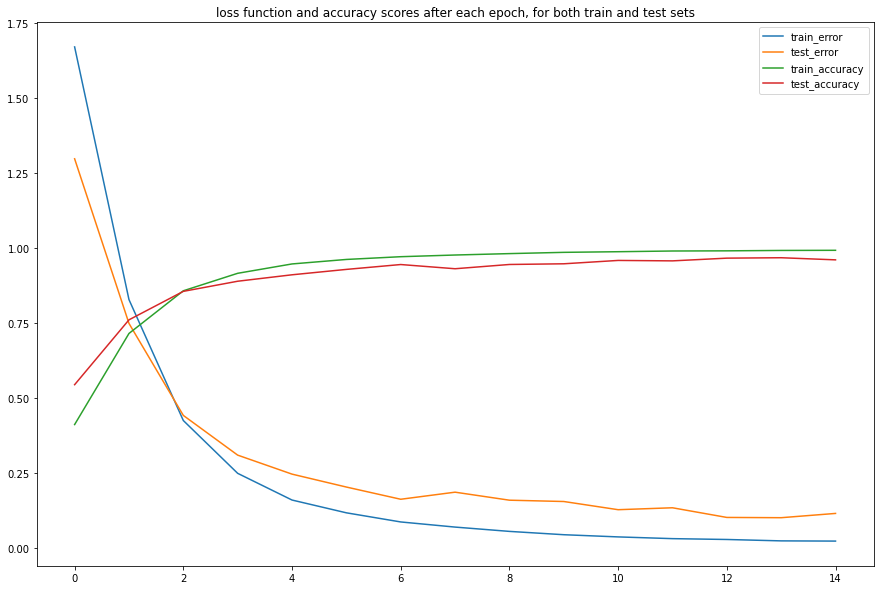

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
plt.title("loss function and accuracy scores after each epoch, for both train and test sets")
plt.plot(history.history['loss'], label='train_error')
plt.plot(history.history['val_loss'], label='test_error')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='test_accuracy')
plt.legend()


Predictions array:  [1.2510984e-11 9.7746474e-01 4.5580033e-13 1.2627592e-15 2.6999482e-15
 1.0811023e-20 8.4585670e-18 8.1062596e-10 2.2534933e-02 3.7262456e-07]

Sum of entries of a single prediction array:  1.0

minimum confidence in a prediction:  0.38726646


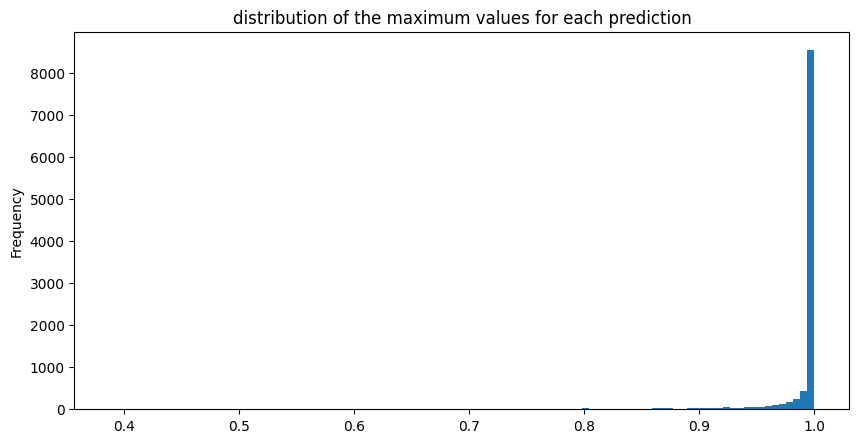

In [ ]:
# now  that we have our model, we can make predictions

predictions = CNNmodel.predict(Test_data)
print("\nPredictions array: ", predictions[0])
print("\nSum of entries of a single prediction array: ",  np.sum(predictions[0]))

x = []
for element in predictions:
  x.append(np.max(element))

print("\nminimum confidence in a prediction: ", np.min(x))

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.hist(x, bins=100)
plt.gca().set(title="distribution of the maximum values for each prediction", ylabel='Frequency');


In [ ]:
test_loss, test_acc = CNNmodel.evaluate(Test_data, Test_labels, verbose=1)
train_loss, train_acc = CNNmodel.evaluate(Train_data,Train_labels, verbose=1)

print('\nTrain accuracy:', train_acc)
print('\nTest accuracy:', test_acc)

1019/1019 [==============================] - 6s 6ms/step - loss: 0.0018 - accuracy: 0.9998

Train accuracy: 0.9998466372489929

Test accuracy: 0.9609389305114746


In [ ]:
predictions = CNNmodel.predict(Test_data)
wrong_classified = []

for x in range(len(Test_labels)):
  index = x - 1

  if np.argmax(predictions[index]) != Test_labels[index]:
    wrong_classified.append(index)

print("Train error eccording to zero-one loss is: ", len(wrong_classified)/len(Test_labels))

Train error eccording to zero-one loss is:  0.039061067302402344


   True labe:  Pear
   Model prediction:  Apple


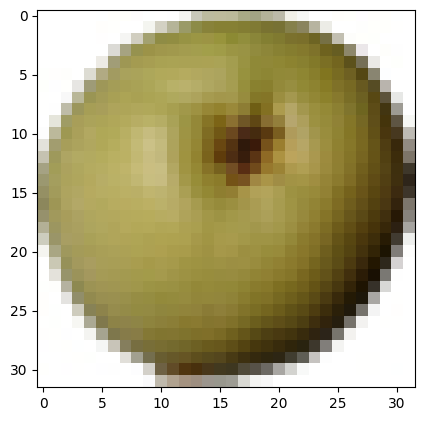



   True labe:  Pepper
   Model prediction:  Tomato


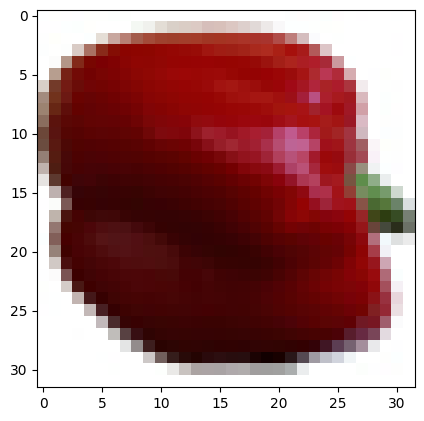



   True labe:  Cherry
   Model prediction:  Grape 


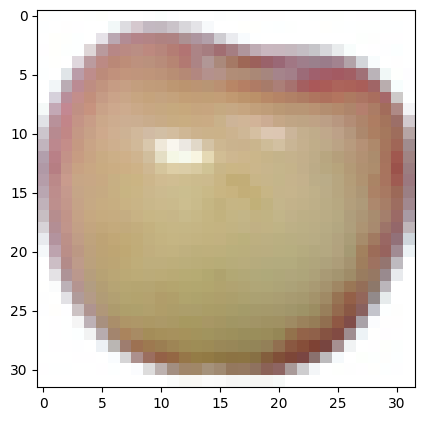

In [ ]:
for i in range(3):
  wrong_classified_index = random.choice(wrong_classified)

  image = Test_data[wrong_classified_index]

  true_label = Test_labels[wrong_classified_index]

  label_predicted = np.argmax(predictions[wrong_classified_index])

  # convert back from array to image, very important to rescale back to 255 max value
  # and convert to uint8
  image2 = Image.fromarray((image * 255).astype(np.uint8))

  print("   True labe: ", GetKey(labels,true_label) )
  print("   Model prediction: ", GetKey(labels, label_predicted) )
  pyplot.imshow(image2)
  pyplot.show()

  print("\n")
